In [7]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/BooleanBenchmark')
import logic_ensemble as le
import seaborn as sns

# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/test_bonesis/'
model = le.LogicEnsemble(model_path, project_name = 'BonesisTutorial')
model.create_simulation()

Simulation object created


In [3]:
# setup initial state for the simulation
initial_state = {'Pax6':1}

# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

In [5]:
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 88/88 [00:02<00:00, 39.97it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1311.55it/s]

Attractors calculation completed


,bn45,bn8,bn12,bn65,bn42,bn60,bn70,bn28,bn63,bn73,bn87,bn58,bn74,bn11,bn30,bn16,bn3,bn41,bn32,bn85,bn82,bn53,bn62,bn4,bn39,bn64,bn27,bn61,bn7,bn14,bn57,bn20,bn18,bn54,bn25,bn24,bn67,bn38,bn29,bn72,bn50,bn31,bn5,bn49,bn35,bn37,bn0,bn81,bn83,bn79,bn80,bn75,bn9,bn46,bn26,bn10,bn13,bn21,bn36,bn23,bn44,bn33,bn86,bn34,bn55,bn40,bn84,bn2,bn6,bn59,bn52,bn77,bn47,bn17,bn68,bn76,bn1,bn56,bn71,bn51,bn19,bn48,bn43,bn69,bn78,bn66,bn22,bn15
000000000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
010100100011,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
001011101000,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0
101000110100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
001001101000,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,1


This shows that actually the two differences between the model 1 and two comes from the fact that you missed one value position when computing the attractor. I'll have to revise the script for doing this better.

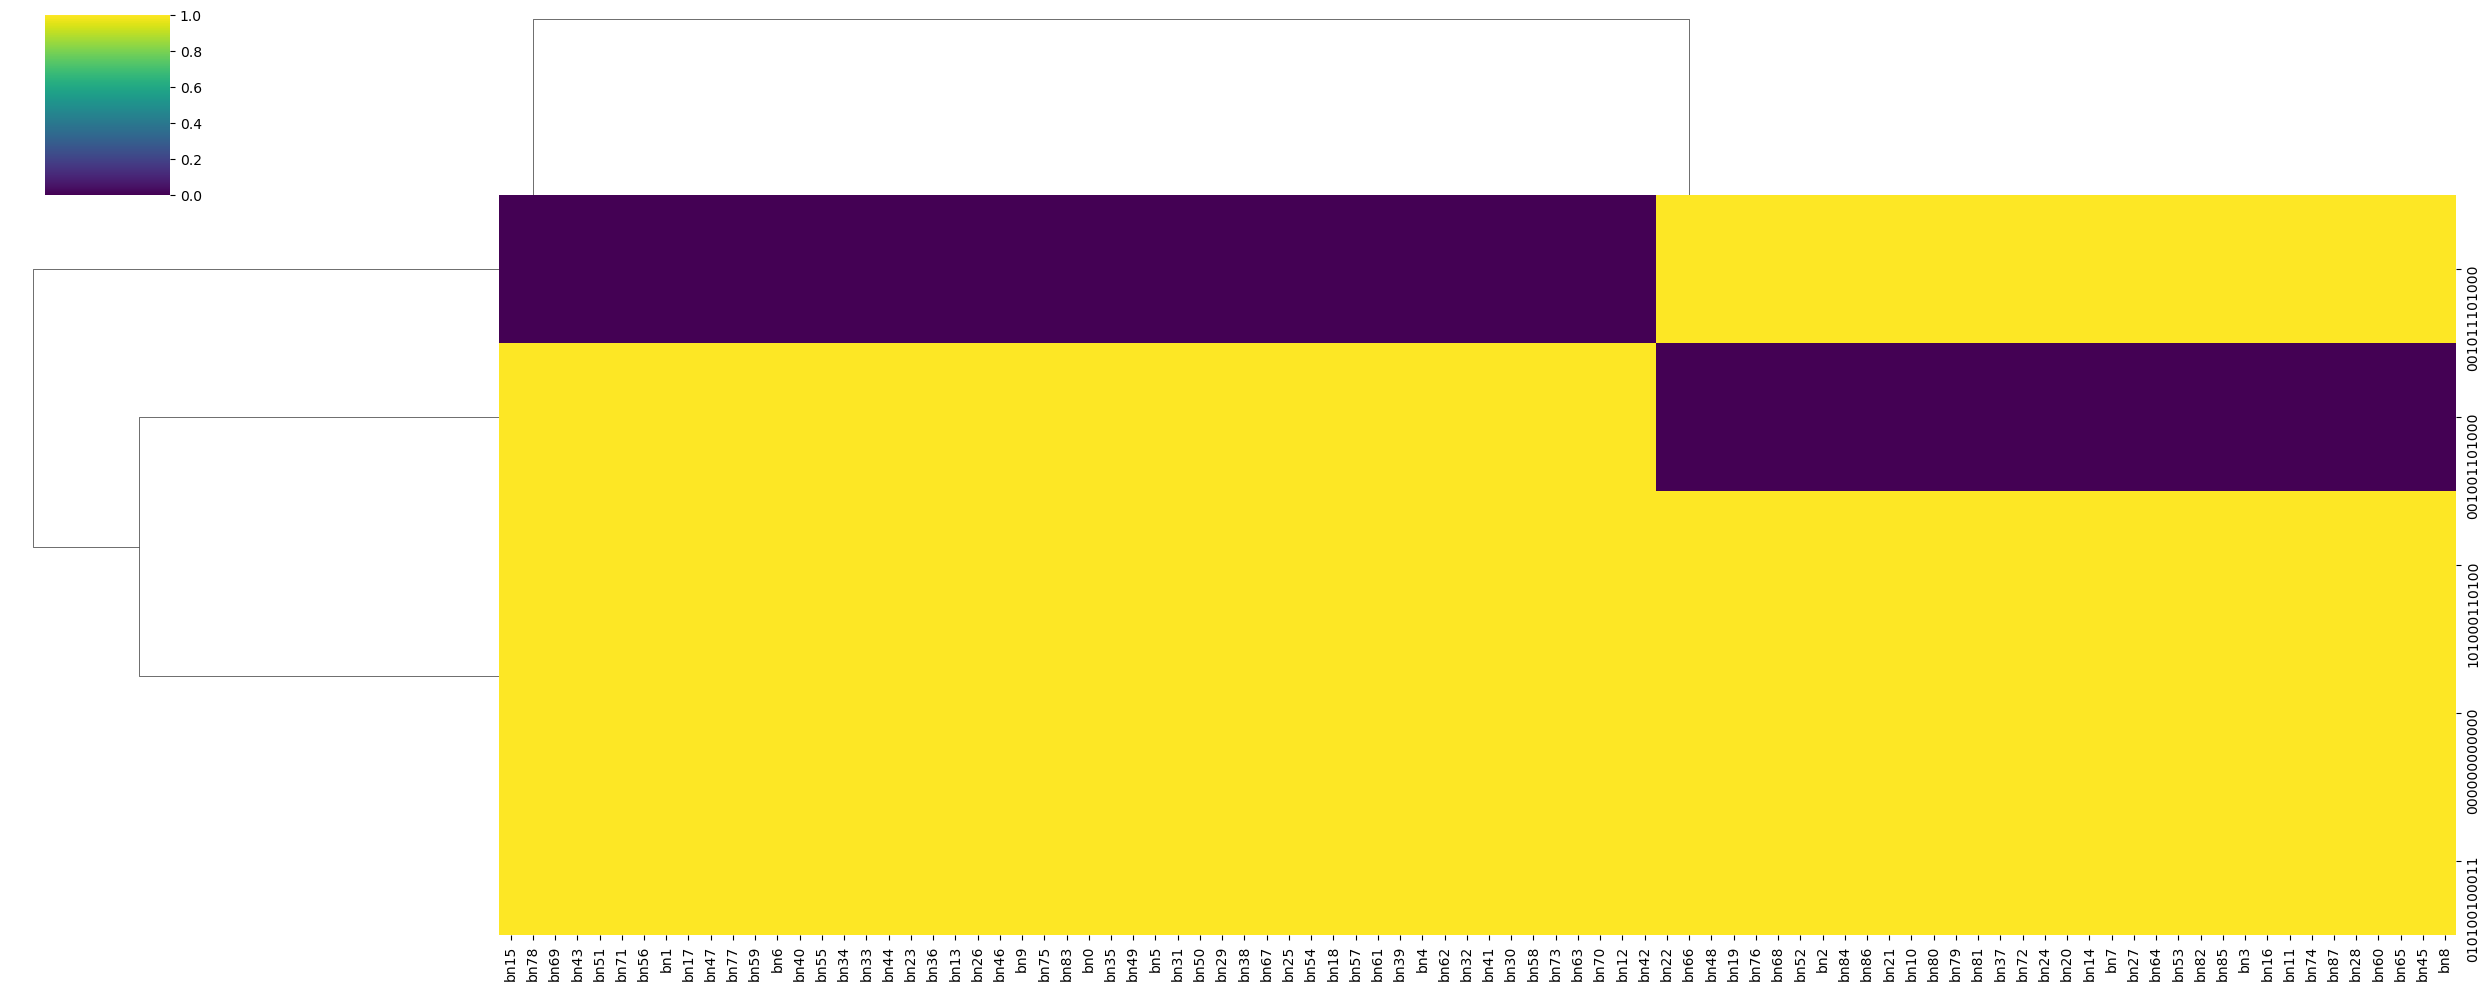

In [8]:
sns.clustermap(model.attractor.attractors_df, 
               cmap = 'viridis', vmax = 1, vmin = 0, figsize = (25,10),
               #linewidth = .5, linecolor = 'black'
               )

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

In [9]:
model.simulation.update_parameters(max_time = 20)
model.simulation.run_simulation(initial_state = initial_state)

Start simulation


100%|██████████| 88/88 [00:09<00:00,  9.18it/s]

Simulation completed


# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

Trajectory object created


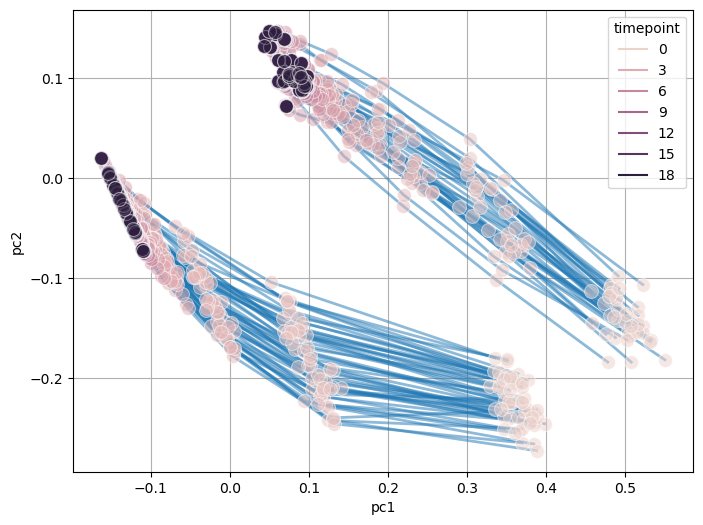

In [10]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

Euclidean k-means
0.017 --> 0.013 --> 0.013 --> 


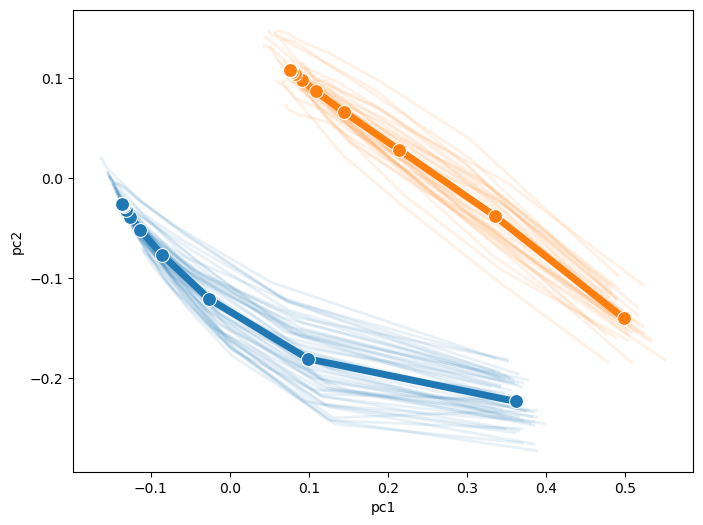

In [11]:
model.trajectory.calculate_kmean_cluster(n_cluster = 2)
model.trajectory.plot_trajectory_cluster(show_legend = True)

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [12]:
model.create_logic()
model.logic.model_logic

Loading models logics


100%|██████████| 88/88 [00:00<00:00, 787.24it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1539.52it/s]

Logic object created


,bn45,bn8,bn12,bn65,bn42,bn60,bn70,bn28,bn63,bn73,bn87,bn58,bn74,bn11,bn30,bn16,bn3,bn41,bn32,bn85,bn82,bn53,bn62,bn4,bn39,bn64,bn27,bn61,bn7,bn14,bn57,bn20,bn18,bn54,bn25,bn24,bn67,bn38,bn29,bn72,bn50,bn31,bn5,bn49,bn35,bn37,bn0,bn81,bn83,bn79,bn80,bn75,bn9,bn46,bn26,bn10,bn13,bn21,bn36,bn23,bn44,bn33,bn86,bn34,bn55,bn40,bn84,bn2,bn6,bn59,bn52,bn77,bn47,bn17,bn68,bn76,bn1,bn56,bn71,bn51,bn19,bn48,bn43,bn69,bn78,bn66,bn22,bn15
Aldh1L1,(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3),(Stat3)
Brn2,(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1),(Mash1 & !Olig2),(Mash1 & !Olig2)
Hes5,(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6),(!Mash1 & Pax6)
Mash1,(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!Hes5 & Pax6),(!H

Flatten models logic clauses


100%|██████████| 88/88 [00:00<00:00, 904653.80it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1198.08it/s]


Flattend logic clause created


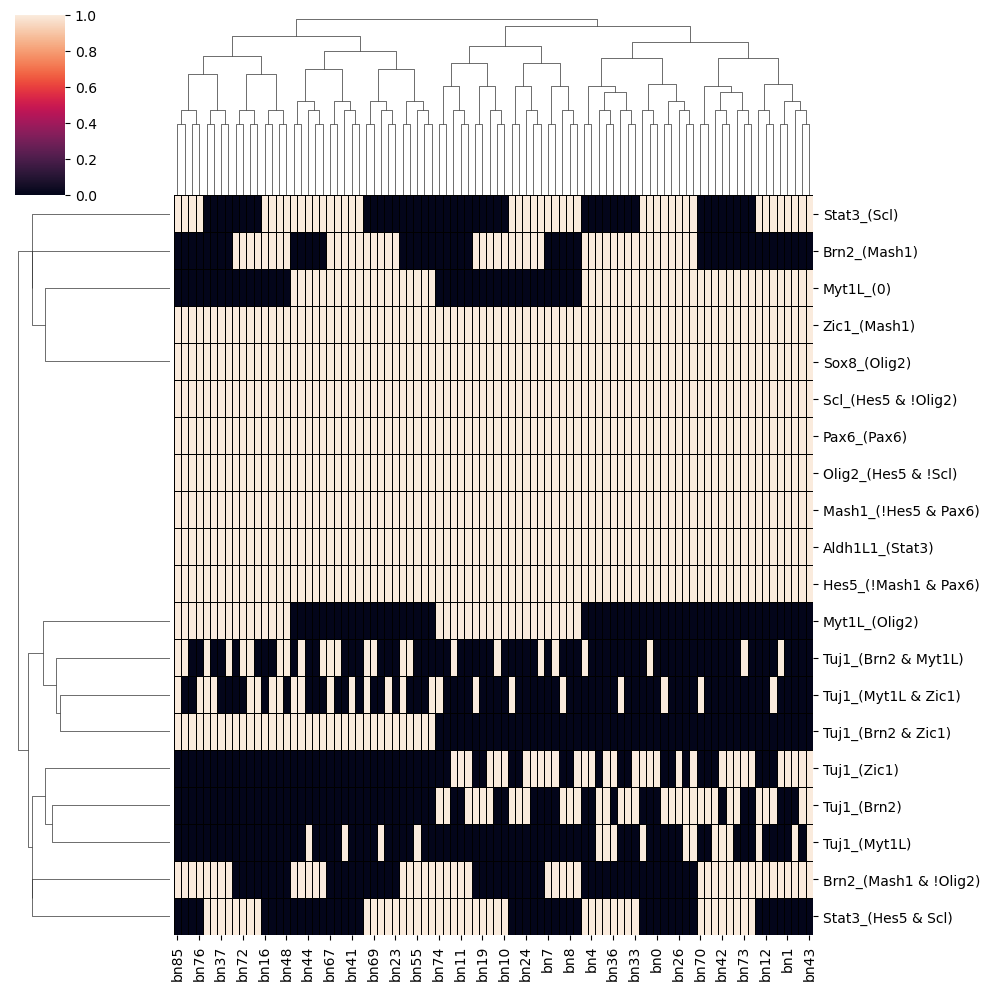

In [13]:
model.logic.create_flattend_logic_clause()

import seaborn as sns
sns.clustermap(model.logic.logic_clause_flattend, linewidth = .4, linecolor = 'black')

PCA calculated


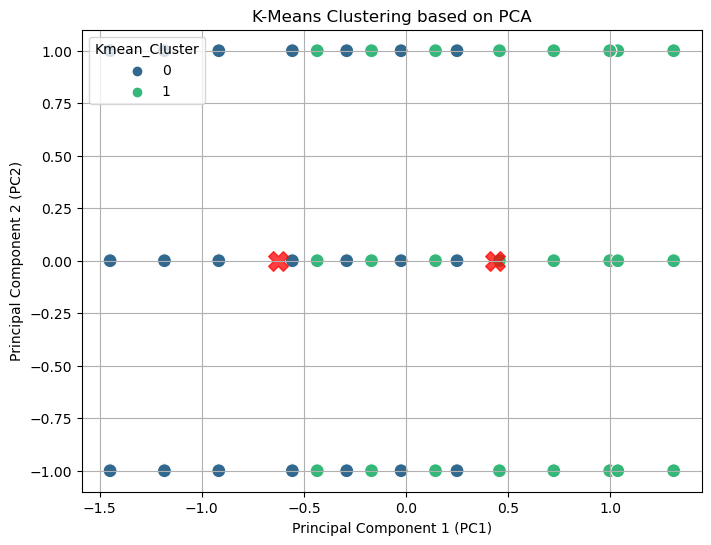

In [9]:
model.logic.calculate_logic_pca()
model.logic.calculate_kmean_cluster(num_cluster=2, plot = True)

In [10]:
model.logic.logic_clause_flattend

,bn45,bn8,bn12,bn65,bn42,bn60,bn70,bn28,bn63,bn73,bn87,bn58,bn74,bn11,bn30,bn16,bn3,bn41,bn32,bn85,bn82,bn53,bn62,bn4,bn39,bn64,bn27,bn61,bn7,bn14,bn57,bn20,bn18,bn54,bn25,bn24,bn67,bn38,bn29,bn72,bn50,bn31,bn5,bn49,bn35,bn37,bn0,bn81,bn83,bn79,bn80,bn75,bn9,bn46,bn26,bn10,bn13,bn21,bn36,bn23,bn44,bn33,bn86,bn34,bn55,bn40,bn84,bn2,bn6,bn59,bn52,bn77,bn47,bn17,bn68,bn76,bn1,bn56,bn71,bn51,bn19,bn48,bn43,bn69,bn78,bn66,bn22,bn15
Aldh1L1_(Stat3),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Brn2_(Mash1),1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
Hes5_(!Mash1 & Pax6),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mash1_(!Hes5 & Pax6),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Myt1L_(Olig2),1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
Olig2_(Hes5 & !Scl),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Pax6_(Pax6),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Scl_(Hes5 & !Olig2),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Sox8_(Olig2),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Stat3_(Scl),1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0

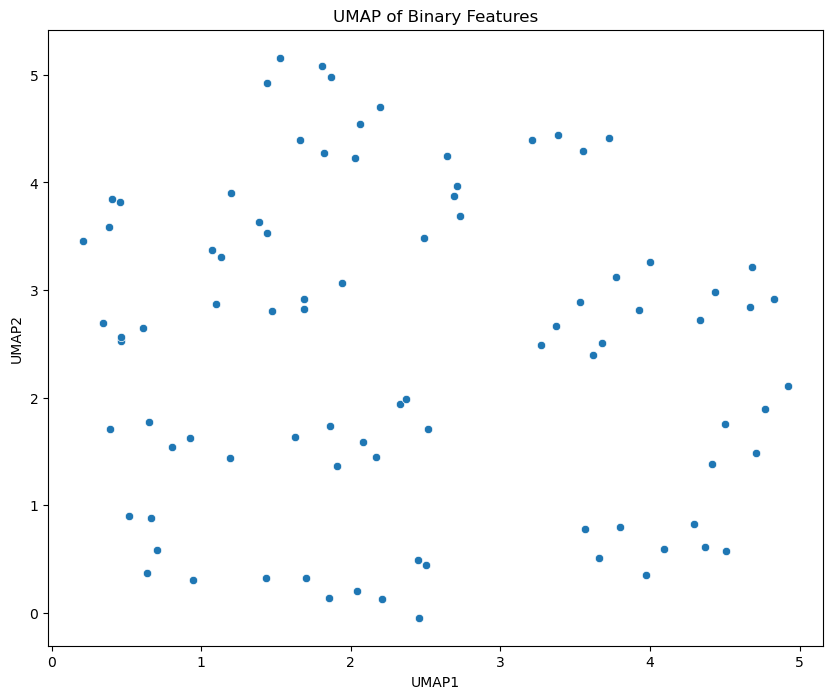

In [11]:
import umap
import matplotlib.pyplot as plt

binary_features = model.logic.logic_clause_flattend.transpose()

# Generate UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(binary_features)

# Convert to DataFrame for easier plotting
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Plot the UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_df)
plt.title('UMAP of Binary Features')
plt.show()

,Aldh1L1_(Stat3),Brn2_(Mash1),Hes5_(!Mash1 & Pax6),Mash1_(!Hes5 & Pax6),Myt1L_(Olig2),Olig2_(Hes5 & !Scl),Pax6_(Pax6),Scl_(Hes5 & !Olig2),Sox8_(Olig2),Stat3_(Scl),Tuj1_(Brn2),Tuj1_(Myt1L & Zic1),Zic1_(Mash1),Brn2_(Mash1 & !Olig2),Myt1L_(0),Stat3_(Hes5 & Scl),Tuj1_(Zic1),Tuj1_(Brn2 & Myt1L),Tuj1_(Myt1L),Tuj1_(Brn2 & Zic1)
bn45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bn8,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
bn12,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
bn65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
bn42,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bn69,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
bn78,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
bn66,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
bn22,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


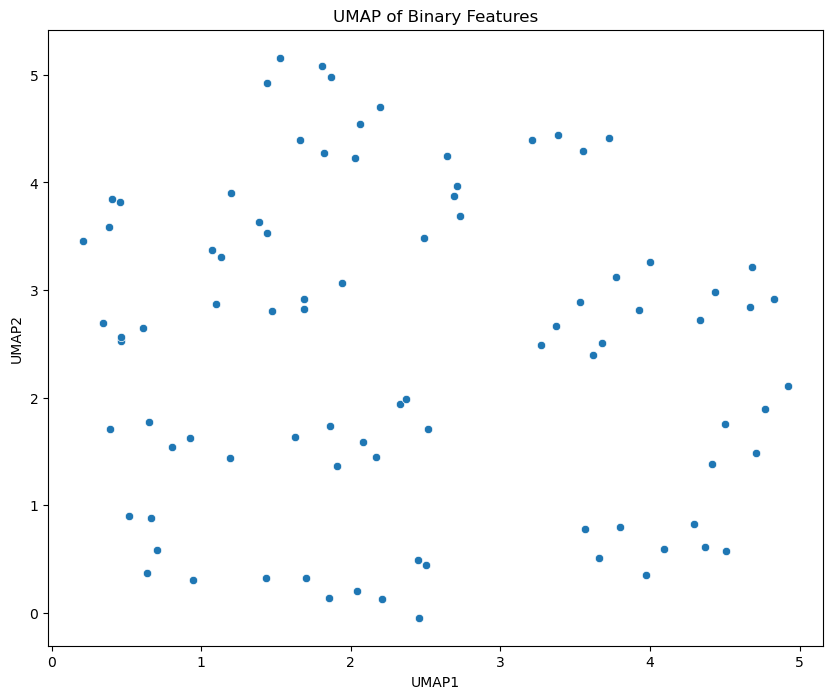

In [19]:
model.trajectory.cluster_dict
model_cluster = pd.Series(model.trajectory.cluster_dict)

# Plot the UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_df)
plt.title('UMAP of Binary Features')
plt.show()

In [7]:
from sklearn.preprocessing import OrdinalEncoder
model_cluster = pd.Series(model.trajectory.cluster_dict)
model_logic = model.logic.model_logic

var_logic_clust = pd.DataFrame()
for i in list(model_cluster.unique()):
    model_logic_sub = model_logic.transpose().loc[list(model_cluster.index[model_cluster == i])]
    #model_logic_sub = model_logic_sub.drop(['logic_cluster'], axis = 1)
    var_logic_length = []
    for j in model_logic_sub.columns:
        num_logic = model_logic_sub[j].value_counts().size
        var_logic_length.append(num_logic)
    var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = model_logic_sub.columns)
    var_logic_clust = pd.concat([var_logic_clust, var_logic_length], axis = 1, ignore_index = False)
var_logic_clust.columns = list(model_cluster.unique())

model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

sort_index = encoded_df.max().sort_values().index

var_logic_clust= var_logic_clust.loc[sort_index] 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
plt.ylim(0, 65)

for i in range(2):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], palette="rocket", ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 95)

plt.xticks(rotation=90)
plt.show()

AttributeError: 'LogicEnsemble' object has no attribute 'trajectory'

# Test function compare logic function between two clusters

In [11]:
cluster0 = model_cluster.index[model_cluster == 0]
cluster1 = model_cluster.index[model_cluster == 1]
test = model.logic.logic_clause_flattend.copy()

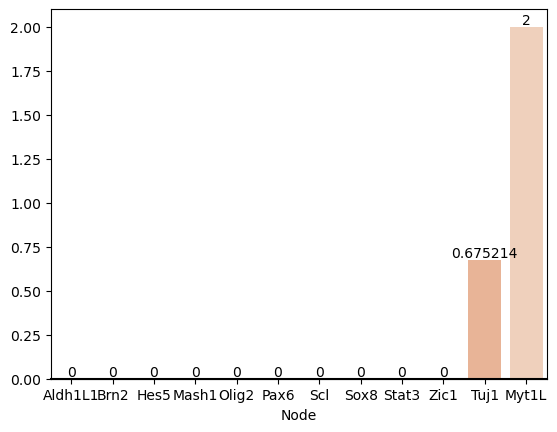

In [12]:
test = model.logic.logic_clause_flattend.copy()
test_dif = test[cluster0].mean(axis = 1) - test[cluster1].mean(axis=1)

# Split the index into two parts
split_index = test_dif.index.str.split('_', expand=True)
split_df = split_index.to_frame(index=False)
split_df['value'] = test_dif.values

# Pivot the DataFrame to create the matrix
matrix = split_df.pivot(index=0, columns= 1, values='value')

# Display the matrix
plot_value = matrix.abs().sum(axis = 1).sort_values(ascending = True)


plot = sns.barplot(x=plot_value.index, y=plot_value.values, palette="rocket")
plot.axhline(0, color="k", clip_on=False)
plot.set_xlabel("Node")
plot.bar_label(plot.containers[0], fontsize=10)
plt.show()

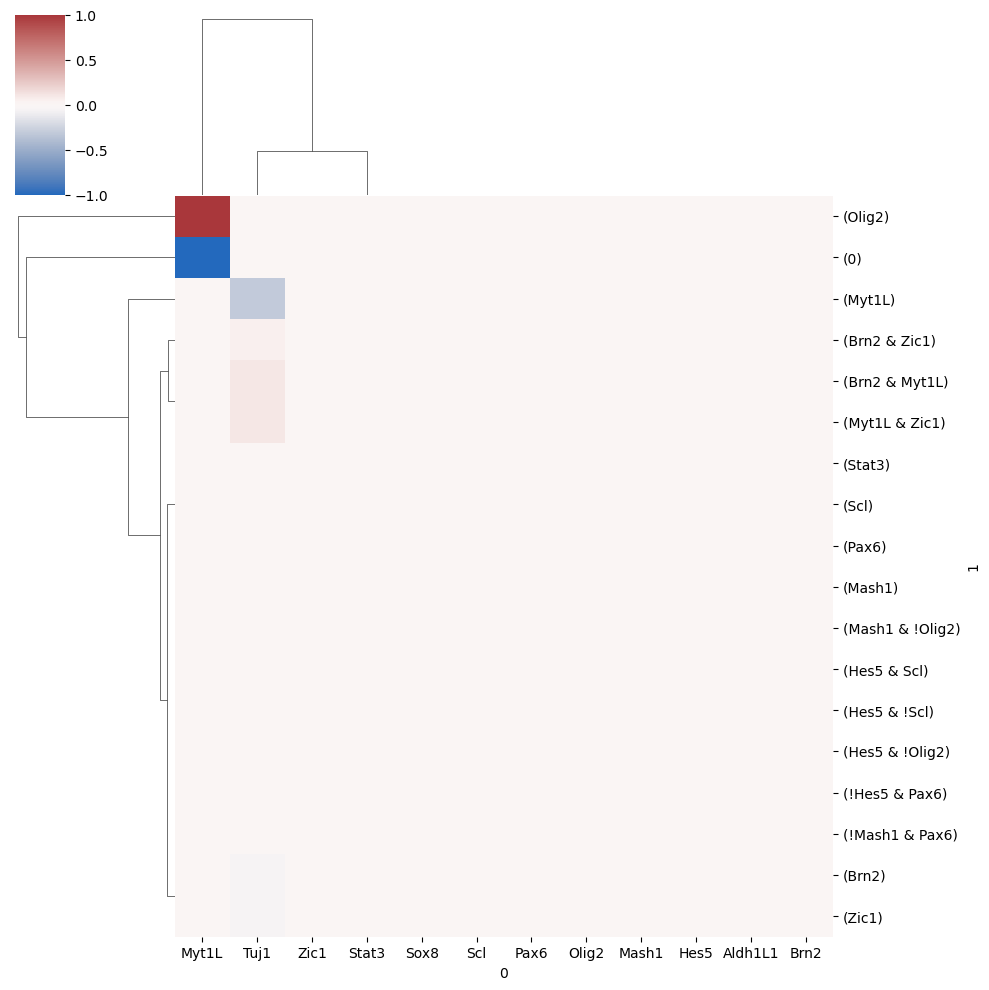

In [13]:
sns.clustermap(matrix.fillna(0).transpose(), cmap = 'vlag', vmax = 1, vmin = -1, )

# Calculate the logic steps 

In [35]:
logic_clause = model.logic.logic_clause_flattend
logic_clause

,bn45,bn8,bn12,bn65,bn42,bn60,bn70,bn28,bn63,bn73,bn87,bn58,bn74,bn11,bn30,bn16,bn3,bn41,bn32,bn85,bn82,bn53,bn62,bn4,bn39,bn64,bn27,bn61,bn7,bn14,bn57,bn20,bn18,bn54,bn25,bn24,bn67,bn38,bn29,bn72,bn50,bn31,bn5,bn49,bn35,bn37,bn0,bn81,bn83,bn79,bn80,bn75,bn9,bn46,bn26,bn10,bn13,bn21,bn36,bn23,bn44,bn33,bn86,bn34,bn55,bn40,bn84,bn2,bn6,bn59,bn52,bn77,bn47,bn17,bn68,bn76,bn1,bn56,bn71,bn51,bn19,bn48,bn43,bn69,bn78,bn66,bn22,bn15
Aldh1L1_(Stat3),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Brn2_(Mash1),1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
Hes5_(!Mash1 & Pax6),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mash1_(!Hes5 & Pax6),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Myt1L_(Olig2),1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
Olig2_(Hes5 & !Scl),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Pax6_(Pax6),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Scl_(Hes5 & !Olig2),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Sox8_(Olig2),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Stat3_(Scl),1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0

In [55]:
import numpy as np

logic_clause = model.logic.logic_clause_flattend
logic_diff = pd.DataFrame()

for i in model_cluster.unique():
    test1 = logic_clause[model_cluster.index[model_cluster == i]].mean(axis = 1)
    row_sum = []
    for j in model_cluster.unique():
        test2 = logic_clause[model_cluster.index[model_cluster == j]].mean(axis = 1)
        test_dif = test1 - test2
        test_dif = np.abs(test_dif).sum()
        row_sum = row_sum + [test_dif]
    row_sum_df = pd.DataFrame([row_sum])  # Convert list to DataFrame
    logic_diff = pd.concat([logic_diff, row_sum_df])

logic_diff.columns = list(model_cluster.unique().astype('str'))
logic_diff.index = list(model_cluster.unique().astype('str'))

In [56]:
logic_diff

,1,0
1,0.000000,2.675214
0,2.675214,0.000000


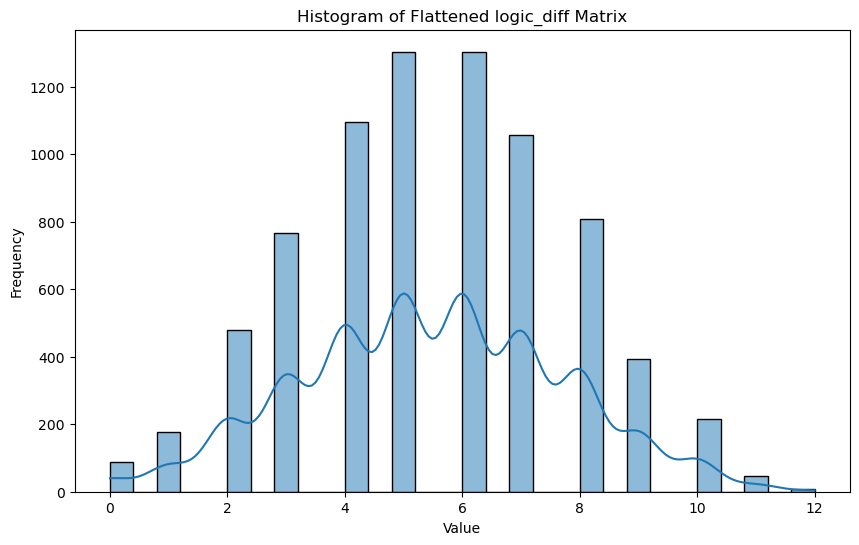

In [14]:
# Flatten the matrix to a 1D array
flattened_array = logic_diff.values.flatten()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(flattened_array, bins=30, kde=True)
plt.title('Histogram of Flattened logic_diff Matrix')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Check if each row contains the value 1
contains_one = logic_diff.apply(lambda row: 1 in row.values, axis=1)

Index(['1', '0'], dtype='object')

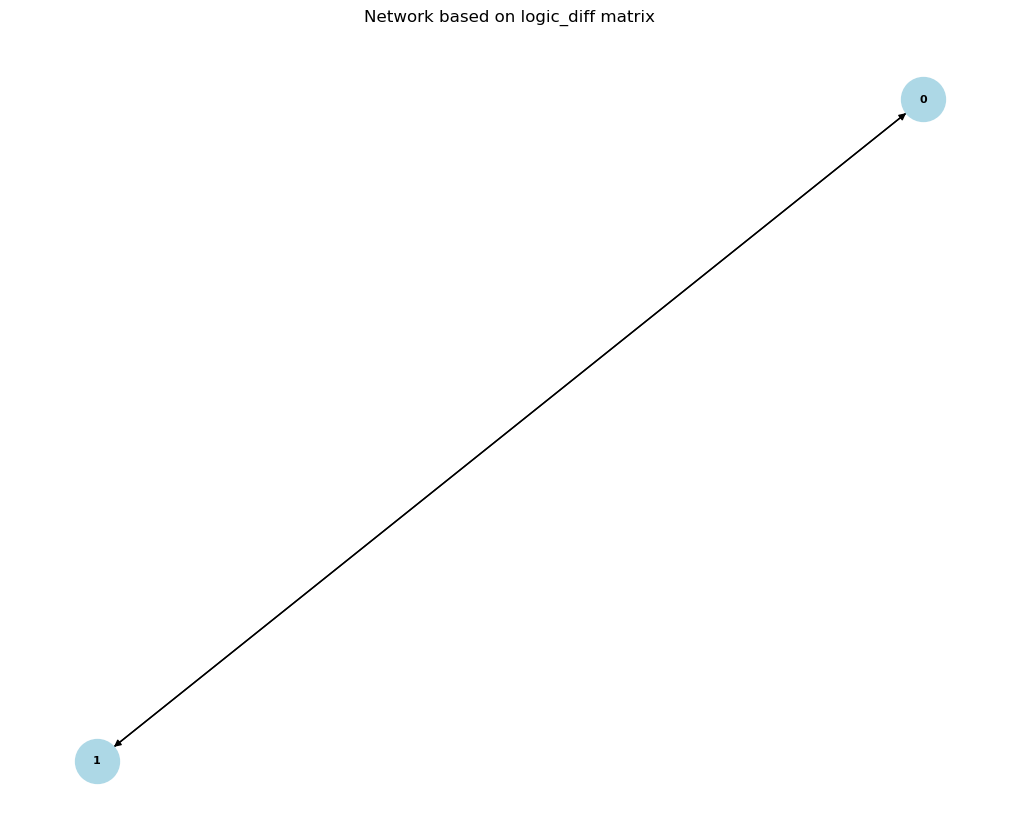

In [61]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample logic_diff matrix
data = {
    'A': [0, 1, 2],
    'B': [1, 0, 3],
    'C': [2, 3, 0]
}
#logic_diff = pd.DataFrame(data, index=['A', 'B', 'C'])

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for source in logic_diff.index:
    for target in logic_diff.columns:
        if logic_diff.loc[source, target] > 0 :  # Assuming 0 means no edge
            G.add_edge(source, target, weight=logic_diff.loc[source, target])

# Draw the network
pos = nx.spring_layout(G)  # Position nodes using the default spring layout with no weight

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_weight='bold', arrows=True)
nx.draw_networkx_edges(G, pos, alpha=0.1)  # Set edge transparency to 0.1

plt.title('Network based on logic_diff matrix')
plt.show()

In [24]:
from logic_ensemble import logical_rules_processing

model_logic_mtx = model.logic.model_logic
logical_rules_processing.logic_clause_frequency(model_logic_mtx)


,Aldh1L1,Brn2,Hes5,Mash1,Myt1L,Olig2,Pax6,Scl,Sox8,Stat3,Tuj1,Zic1
(Stat3),1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
(Mash1 & !Olig2),0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
(Mash1),0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
(!Mash1 & Pax6),0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
(!Hes5 & Pax6),0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
(0),0.0,0.0,0.0,0.0,0.590909,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
(Olig2),0.0,0.0,0.0,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,0.000000,0.0
(Hes5 & !Scl),0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
(Pax6),0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
(Hes5 & !Olig2),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0
